# <center>ART.T458 Advanced Machine Learning</center><center>Midterm Assignment</center>

<p style='text-align: right;'> Department of Computer Science <br> 20M31378 Xu Hongkun </p>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import rand
from numpy.random import randn
from numpy.linalg import inv
import matplotlib.pyplot as plt
import cvxpy as cp

## Problem 1

### dataset IV

In [13]:
# dataset 4
n = 200
x_temp = 3 * (rand(n, 4) - 0.5)
y = (2 * x_temp[:, 0] - 1 * x_temp[:, 1] + 0.5 + 0.5 * randn(n)) > 0
y = 2 * y -1

print("x:", x_temp.shape)
print("y:", y.shape)

x: (200, 4)
y: (200,)


In [14]:
bias = np.ones((n, 1))
x = np.hstack((x_temp, bias))
x.shape

(200, 5)

In [15]:
def posterior_probability(w, x_i, y_i):
    exp_part = np.exp(-1*y_i*(w.T@x_i))
    return exp_part/(1+exp_part)

In [16]:
# gradient
def gradient(n, w, x, y, _lambda):
    grad = 0
    for i in range(n):
        e = posterior_probability(w, x[i].reshape(-1,1), y[i])
        grad += -1*y[i]*e*x[i].reshape(-1,1)
    
    grad += 2*_lambda*w.reshape(-1,1)
    
    return grad

In [7]:
# Hessian matrix
def hessian(n, w, x, y, _lambda):
    H = np.ones((w.shape[0], w.shape[0]))
    for i in range(n):
        e = posterior_probability(w, x[i].reshape(-1,1), y[i])
        H += e*(x[i].reshape(-1,1)@x[i].reshape(1,-1))
        
    H += 2*_lambda*np.eye(w.shape[0])
    
    return H

In [8]:
def J_w(n, w, x, y, _lambda):
    J = 0
    for i in range(n):
        J += np.log(1 + np.exp(-1*y[i]*(w.T@x[i].reshape(-1,1))))
        
    J += _lambda*(w.T@w)
    return J

In [9]:
_lambda = 0.1
lr = 0.001
steps = 20
w_init = rand(x.shape[1]).reshape(-1,1) # initialization

### 1. Batch steepest gradient method

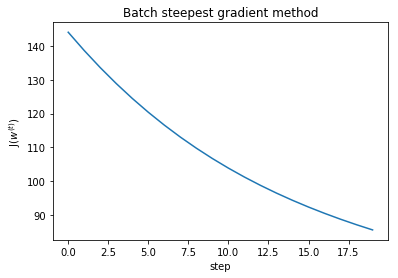

In [17]:
w1 = w_init.copy()
J_gradient_list = []

for step in range(steps):
    grad1 = gradient(n, w1, x, y, _lambda)
    w1 -= lr*grad1
    J = J_w(n, w1, x, y, _lambda).item()
    
    J_gradient_list.append(J)
    
plt.plot(range(steps), J_gradient_list)
plt.title("Batch steepest gradient method")
plt.xlabel("step")
plt.ylabel("J(${w^{(t)}}$)")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Batch_steepest_gradient_method.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Batch_steepest_gradient_method.png',bbox_inches='tight')

plt.show()

### 2. Newton based method

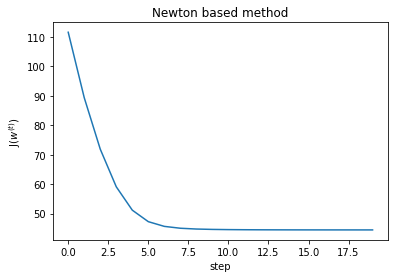

In [18]:
w2 = w_init.copy()
J_Newton_list = []

for step in range(steps):
    grad2 = gradient(n, w2, x, y, _lambda)
    h = hessian(n, w2, x, y, _lambda)
    w2 -= inv(h)@grad2
    J = J_w(n, w2/2, x, y, _lambda).item()
    
    J_Newton_list.append(J)
    
plt.plot(range(steps), J_Newton_list)
plt.title("Newton based method")
plt.xlabel("step")
plt.ylabel("J(${w^{(t)}}$)")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Newton_based_method.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Newton_based_method.png',bbox_inches='tight')

plt.show()

### 3. Compare

optimal J: 57.09716105577215


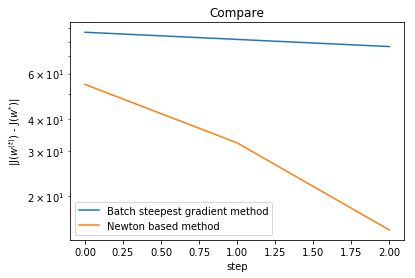

In [20]:
plot_steps = 3
w_optimal = np.array([2, -1, 0, 0, 0.5]).reshape(-1, 1)
J_optimal = J_w(n, w_optimal, x, y, _lambda)
print("optimal J:", J_optimal.item())

J_gradient = []
J_Newton = []

for i in range(len(J_gradient_list)):
    J_gradient.append(np.abs(J_gradient_list[i] - J_optimal.item()))

for i in range(len(J_Newton_list)):
    J_Newton.append(np.abs(J_Newton_list[i] - J_optimal.item()))
    
plt.semilogy(range(plot_steps), J_gradient[:plot_steps], label='Batch steepest gradient method')
plt.semilogy(range(plot_steps), J_Newton[:plot_steps], label='Newton based method')
plt.legend(loc='lower left')
plt.title("Compare")
plt.xlabel("step")
plt.ylabel("|J(${w^{(t)}}$) - J(${w^{*}}$)|")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Compare.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Compare.png',bbox_inches='tight')

plt.show()

### 4. Multiclass Problem

### Dataset V

In [21]:
# dataset 5
n = 200
x = 3 * (rand(n, 4) - 0.5)
W = np.array([[ 2, -1, 0.5],
              [-3,  2,   1],
              [ 1,  2,   3]])

H = np.hstack((x[:,0:2], np.ones((n, 1))))  # horizontal combination：[1, 2] + 3

Res = H @ W.T + 0.5 * randn(n ,3)

maxlogit = Res.max(axis=1).reshape(-1,1)    # 各行の最大値
y = Res.argmax(axis=1).reshape(-1,1)        # 最大値のインデックス(クラス)

print("x:", H.shape) # Here we assume H is input x
print("y:", y.shape) # 3 class 

cls = 3
x = H

x: (200, 3)
y: (200, 1)


In [22]:
# one-hot
y_ = np.zeros((n, cls))
for index in range(y_.shape[0]):
    y_[index][y[index]] = 1

# multiclass input y_
print("y:", y_.shape)

y: (200, 3)


In [5]:
def posterior_probability_multi(W, j, x_i):
    exp_sum = 0
    for i in range(cls):
        exp_sum += np.exp(W[i].reshape(1, -1)@x_i.reshape(-1, 1)) # exp(800) -> inf
        
    return (np.exp(W[j].reshape(1, -1)@x_i.reshape(-1, 1))/exp_sum).item()

In [6]:
def J_w_multi(n, W, X, Y, _lambda):
    J = 0
    for i in range(n):
        J -= np.log(posterior_probability_multi(W, np.argmax(Y[i]), X[i]))
    
    # regularization
    r = 0
    for c in range(cls):
        r += W[c]@W[c].T
        
    J += _lambda*r
    
    return J

In [7]:
# gradient
def gradient_multi(n, W, X, Y, _lambda):
    grad = np.zeros(W.shape)
    
    for c in range(cls):
        
        for i in range(n):
            grad[c] -= (Y[i][c]-posterior_probability_multi(W, c, X[i]))*X[i].reshape(cls)
    
        grad[c] += 2*_lambda*W[c].reshape(cls)
    
    return grad

In [8]:
# Hessian matrix
def hessian_multi_tj(n, W, X, _lambda, t, j):
    hessian_tj = np.zeros(W.shape)
    I = np.eye(cls)
    
    for i in range(n):
        e_t = posterior_probability_multi(W, t, X[i])
        e_j = posterior_probability_multi(W, j, X[i])
        hessian_tj += e_t * (I[t][j]-e_j) * (X[i].reshape(-1,1)@X[i].reshape(1,-1))
            
    hessian_tj += 2 * _lambda * np.eye(W.shape[1])
    
    return hessian_tj

def hessian_multi(n, W, X, _lambda):
    hessian = []
    for t in range(cls):
        for j in range(cls):
            hessian.append(hessian_multi_tj(n, W, X, _lambda, t, j))
    
    result = np.block([[hessian[0],hessian[1], hessian[2]],[hessian[3],hessian[4], hessian[5]],[hessian[6],hessian[7], hessian[8]]])
    
    return result

### start training

In [15]:
_lambda = 0.1
lr = 0.005
steps = 20
w_init2 = rand(9).reshape(3,3) # initialization

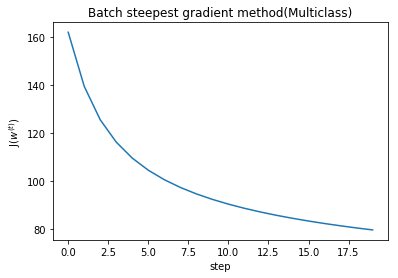

In [23]:
# Batch steepest gradient method
w1 = w_init2.copy()

J_gradient_multi_list = []

for step in range(steps):
    # gradient_multi(n, W, X, Y, _lambda)
    grad1 = gradient_multi(n, w1, x, y_, _lambda)
    w1 -= lr*grad1
        
    # J_w_multi(n, W, X, Y, _lambda)
    J = J_w_multi(n, w1, x, y_, _lambda).item()
    J_gradient_multi_list.append(J)
    
plt.plot(range(steps), J_gradient_multi_list)
plt.title("Batch steepest gradient method(Multiclass)")
plt.xlabel("step")
plt.ylabel("J(${w^{(t)}}$)")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Batch_steepest_gradient_method_multi.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Batch_steepest_gradient_method_multi.png',bbox_inches='tight')

plt.show()

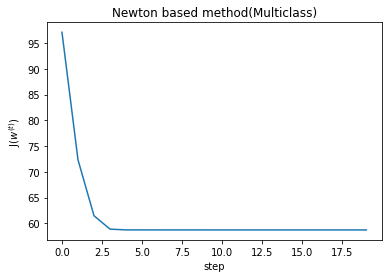

In [24]:
# Newton based method
w2 = w_init2.copy()
J_Newton_multi_list = []

for step in range(steps):
    
    w2 = w2.reshape(cls, -1)
    # gradient_multi(n, W, X, Y, _lambda)
    grad2 = gradient_multi(n, w2, x, y_, _lambda)
    
    # hessian_multi(n, W, X, _lambda)
    h = hessian_multi(n, w2, x, _lambda)
    w2 = w2.reshape(-1)
    w2 -= inv(h)@grad2.reshape(-1)
    
    w2 = w2.reshape(cls, -1)
    # print(w2)
    
    J = J_w_multi(n, w2, x, y_, _lambda).item()
    J_Newton_multi_list.append(J)
    
plt.plot(range(steps), J_Newton_multi_list)
plt.title("Newton based method(Multiclass)")
plt.xlabel("step")
plt.ylabel("J(${w^{(t)}}$)")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Newton_based_method_multi.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Newton_based_method_multi.png',bbox_inches='tight')

plt.show()

optimal J: 67.14491042533592


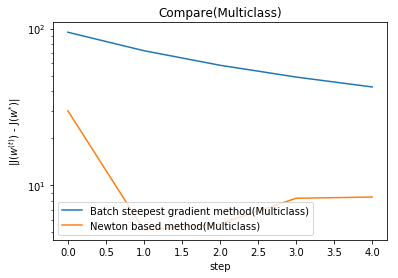

In [25]:
# compare
plot_steps = 5
w_optimal_multi = np.array([[ 2, -1, 0.5],
                            [-3,  2,   1],
                            [ 1,  2,   3]])
J_optimal_multi = J_w_multi(n, w_optimal_multi, x, y_, _lambda)
print("optimal J:", J_optimal_multi.item())

J_gradient_multi = []
J_Newton_multi = []

for i in range(len(J_gradient_multi_list)):
    J_gradient_multi.append(np.abs(J_gradient_multi_list[i] - J_optimal_multi.item()))

for i in range(len(J_Newton_multi_list)):
    J_Newton_multi.append(np.abs(J_Newton_multi_list[i] - J_optimal_multi.item()))
    
plt.semilogy(range(plot_steps), J_gradient_multi[:plot_steps], label='Batch steepest gradient method(Multiclass)')
plt.semilogy(range(plot_steps), J_Newton_multi[:plot_steps], label='Newton based method(Multiclass)')
plt.legend(loc='lower left')
plt.title("Compare(Multiclass)")
plt.xlabel("step")
plt.ylabel("|J(${w^{(t)}}$) - J(${w^{*}}$)|")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Compare_Multiclass.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Compare_Multiclass.png',bbox_inches='tight')

plt.show()

## Problem 3

### dataset II

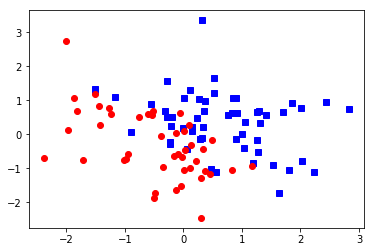

In [33]:
# dataset 2
n = 100
omega = randn()
noise = 0.8 * randn(n)

x = randn(n, 2)
# y = 2 * ((omega[0,0] * x[:, 0]).reshape(-1, 1) + x[:, 1].reshape(-1, 1) + noise > 0) - 1
y = 2 * (omega * x[:, 0] + x[:, 1] + noise > 0) - 1

plt.plot(np.extract(y>0, x[:,0]),np.extract(y>0, x[:,1]), 'bs')
plt.plot(np.extract(y<0, x[:,0]),np.extract(y<0, x[:,1]), 'ro')
plt.show()

In [34]:
print(x.shape, y.shape)

(100, 2) (100,)


In [35]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [36]:
def Get_w(alpha, n, x, y, _lambda):
    w = np.zeros(x.shape[1]).reshape(-1, 1)
    
    for i in range(n):
        w += alpha[i]*y[i]*x[i].reshape(-1,1)
    w = 1/(2*_lambda)*w
    return w

In [37]:
def Get_K(n, x, y):
    K = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            K[i][j] = y[i]*y[j]*(x[i]@x[j])
    
    return K

In [38]:
def projected_gradient(alpha):
    for i in range(len(alpha)):
        if alpha[i] < 0.5:
            alpha[i] = 0
        if alpha[i] > 0.7:
            alpha[i] = 1
            
    return alpha

In [39]:
def L_w(w, x, y, n, _lambda):
    loss = 0
    for i in range(n):
        hinge = 1 - y[i]*(w.T@x[i])
        if hinge > 0:
            loss += hinge
    
    loss += _lambda*(w.T@w).item()
    
    return loss

In [40]:
def dual_Lagrange_function(alpha, K, _lambda):
    return 1/4*_lambda*(alpha.T @ K @ alpha) + alpha.sum()

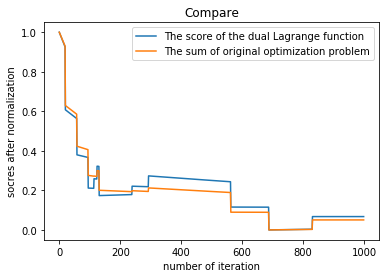

In [41]:
_lambda = 0.1
steps = 1000
K = Get_K(n, x, y)

lr = 0.001
alpha = rand(n).reshape(-1,1) # initialization

scores = []
losses = []

for step in range(steps):
    alpha = projected_gradient(alpha - lr*(1/2*_lambda*(K@alpha) - 1))
    
    score = dual_Lagrange_function(alpha, K, _lambda).item()
    
    w = Get_w(alpha, n, x, y, _lambda)
    
    loss = L_w(w, x, y, n, _lambda).item()
    
    scores.append(score)
    losses.append(loss)

plt.plot(range(steps), normalization(scores), label="The score of the dual Lagrange function")
plt.plot(range(steps), normalization(losses), label="The sum of original optimization problem")
plt.legend(loc='upper right')
plt.title("Compare")
plt.xlabel("number of iteration")
plt.ylabel("socres after normalization")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/duality.eps', format='eps', bbox_inches='tight')
plt.savefig('out/duality.png',bbox_inches='tight')

plt.show()

## Problem 5

### dataset I

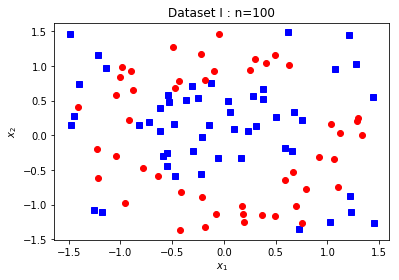

In [42]:
# dataset 1
np.random.seed(123)
n = 100
x = 3 * (rand(n, 2)-0.5)
radius = x[:,0]**2 + x[:,1]**2
y = (radius > 0.7 + 0.1 * randn(n)) &( radius < 2.2 + 0.1 * randn(n))
y = 2 * y -1

plt.plot(x[y < 0, 0],  x[y < 0, 1], 'bs')
plt.plot(x[y > 0, 0],  x[y > 0, 1], 'ro')
plt.title("Dataset I : n=100")
plt.xlabel("${x_{1}}$")
plt.ylabel("${x_{2}}$")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/Dataset_I.eps', format='eps', bbox_inches='tight')
plt.savefig('out/Dataset_I.png',bbox_inches='tight')
plt.show()

y = y.reshape(-1,1)

# one = np.ones((n, 1))
# x = np.hstack((x, one))

In [43]:
print(x.shape, y.shape)

(100, 2) (100, 1)


In [44]:
def Gaussian_kernel(x, y, alpha):
    Num = x.shape[0] # dim of samples
    k = np.zeros((Num,Num))
    
    for i in range(Num):
        for j in range(Num):
            k[i][j] = y[i]*y[j]*np.exp(-alpha*(x[i]-x[j])@(x[i]-x[j]).T)
    
    return k

In [57]:
y = y.reshape(-1,1)
alpha =0.5
m = len(y) # # of samples
d = x.shape[1] # dim of samples

a = cp.Variable(shape=(m,1),pos=True) # lagrange multiplier
C = 1 # trade-off parameter

# G = np.matmul(y*x, (y*x).T) 
G = Gaussian_kernel(x, y, alpha) # Gram matrix

objective = cp.Maximize(cp.sum(a)-(1/2)*cp.quad_form(a, G))

constraints = [a <= C, cp.sum(cp.multiply(a,y)) == 0] # box constraint
prob = cp.Problem(objective, constraints)
result = prob.solve()

# print(a.value())

In [50]:
def f(x_1, x_2):
    val = 0
    for i in range(n):
        val += a.value[i].item()*y[i].item()*np.exp(-alpha*((x_1-x[i][0])**2 + (x_2-x[i][1])**2))
        
    return val

In [51]:
plot_n = 256
x_1 = np.linspace(-2, 2, plot_n)
x_2 = np.linspace(-2, 2, plot_n)
X,Y = np.meshgrid(x_1, x_2)

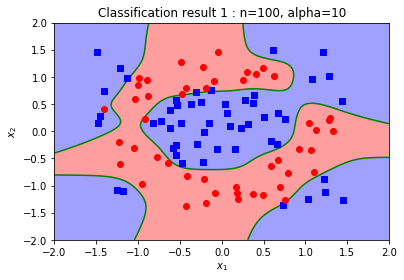

In [53]:
plt.contourf(X, Y, f(X, Y), 0, alpha=.75, cmap='bwr')
C = plt.contour(X, Y, f(X, Y), 0, colors='green', linewidth=.5)

y = y.reshape(n)

plt.plot(x[y < 0, 0],  x[y < 0, 1], 'bs')
plt.plot(x[y > 0, 0],  x[y > 0, 1], 'ro')
plt.title("Classification result 1 : n=100, alpha=10")
plt.xlabel("${x_{1}}$")
plt.ylabel("${x_{2}}$")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/result1.eps', format='eps', bbox_inches='tight')
plt.savefig('out/result1.png',bbox_inches='tight')
plt.show()

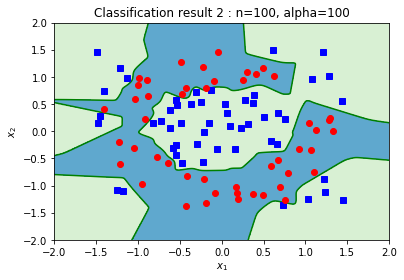

In [56]:
plt.contourf(X, Y, f(X, Y), 0, alpha=.75, cmap='GnBu')
C = plt.contour(X, Y, f(X, Y), 0, colors='green', linewidth=.5)

y = y.reshape(n)

plt.plot(x[y < 0, 0],  x[y < 0, 1], 'bs')
plt.plot(x[y > 0, 0],  x[y > 0, 1], 'ro')
plt.title("Classification result 2 : n=100, alpha=100")
plt.xlabel("${x_{1}}$")
plt.ylabel("${x_{2}}$")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/result2.eps', format='eps', bbox_inches='tight')
plt.savefig('out/result2.png',bbox_inches='tight')
plt.show()

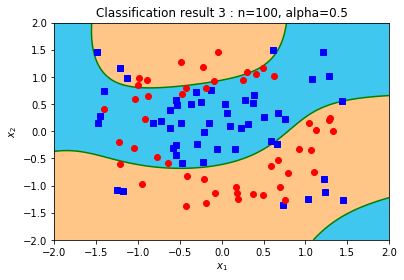

In [59]:
plt.contourf(X, Y, f(X, Y), 0, alpha=.75, cmap='rainbow')
C = plt.contour(X, Y, f(X, Y), 0, colors='green', linewidth=.5)

y = y.reshape(n)

plt.plot(x[y < 0, 0],  x[y < 0, 1], 'bs')
plt.plot(x[y > 0, 0],  x[y > 0, 1], 'ro')
plt.title("Classification result 3 : n=100, alpha=0.5")
plt.xlabel("${x_{1}}$")
plt.ylabel("${x_{2}}$")
esp_fig = plt.gcf() # get current figure
esp_fig.savefig('out/result3.eps', format='eps', bbox_inches='tight')
plt.savefig('out/result3.png',bbox_inches='tight')
plt.show()